In [124]:
from ML_Preparation.Preprocessing_M import DataExtractor, DataPreprocessing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

In [125]:
de = DataExtractor(r"C:\Users\Leonard\OneDrive\Dokumente\5_Semester\IoT\iot_co2_ampel_m\raw_data", r"C:\Users\Leonard\OneDrive\Dokumente\5_Semester\IoT\iot_co2_ampel_m\extracted_data")
df = de.create_df()

Read data successfully.
Data contains 979166 data points and 18 columns.


### Overview

In [126]:
df.head()

,date_time,device_id,tmp,hum,CO2,VOC,vis,IR,WIFI,BLE,rssi,channel_rssi,snr,gateway,channel_index,spreading_factor,bandwidth,f_cnt
0,2022-06-01 11:21:03,hka-aqm-m001,24.62,31.81,770,450,155,71,7,4,-99,-99,7.2,drag-lps8-02,7,7,125000,2
1,2022-06-01 11:21:20,hka-aqm-m001,24.46,31.71,688,450,183,86,3,4,-101,-101,7.0,drag-lps8-02,5,7,125000,3
2,2022-06-01 11:21:40,hka-aqm-m001,24.60,31.84,627,450,184,86,3,7,-97,-97,5.0,drag-lps8-02,3,7,125000,4
3,2022-06-01 11:22:01,hka-aqm-m001,24.52,31.71,585,450,180,84,4,10,-100,-100,6.5,drag-lps8-02,1,7,125000,5
4,2022-06-01 11:23:01,hka-aqm-m001,25.14,31.84,559,450,178,83,5,10,-102,-102,3.5,drag-lps8-02,6,7,125000,6


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979166 entries, 0 to 979165
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date_time         979166 non-null  object 
 1   device_id         979166 non-null  object 
 2   tmp               979166 non-null  float64
 3   hum               979166 non-null  float64
 4   CO2               979166 non-null  int64  
 5   VOC               979166 non-null  int64  
 6   vis               979166 non-null  int64  
 7   IR                979166 non-null  int64  
 8   WIFI              979166 non-null  int64  
 9   BLE               979166 non-null  int64  
 10  rssi              979166 non-null  int64  
 11  channel_rssi      979166 non-null  int64  
 12  snr               979166 non-null  object 
 13  gateway           979166 non-null  object 
 14  channel_index     979166 non-null  int64  
 15  spreading_factor  979166 non-null  int64  
 16  bandwidth         97

In [128]:
df.describe()

,tmp,hum,CO2,VOC,vis,IR,WIFI,BLE,rssi,channel_rssi,channel_index,spreading_factor,bandwidth,f_cnt
count,979166.000000,979166.000000,979166.000000,979166.000000,979166.000000,979166.000000,979166.000000,979166.000000,979166.000000,979166.000000,979166.00000,979166.000000,979166.0,979166.000000
mean,23.062647,42.268031,834.725917,1077.467033,320.240057,92.920465,2.707651,4.667678,-108.117919,-108.117919,3.49297,7.991810,125000.0,9549.678156
std,3.500564,9.507149,3695.416280,1343.530722,903.685401,265.913650,9.883240,13.713992,22.136894,22.136894,2.29838,1.314035,0.0,9564.381335
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-144.000000,-144.000000,0.00000,7.000000,125000.0,1.000000
25%,21.080000,36.190000,436.000000,646.000000,6.000000,1.000000,1.000000,0.000000,-123.000000,-123.000000,1.00000,7.000000,125000.0,1536.000000
50%,22.860000,41.720000,484.000000,903.000000,31.000000,8.000000,2.000000,0.000000,-115.000000,-115.000000,4.00000,8.000000,125000.0,6001.000000
75%,25.150000,47.660000,592.000000,1248.000000,338.000000,105.000000,4.000000,4.000000,-103.000000,-103.000000,5.00000,8.000000,125000.0,15757.000000
max,614.450000,647.770000,65530.000000,29522.000000,46095.000000,59138.000000,255.000000,255.000000,118.000000,118.000000,7.00000,12.000000,125000.0,46697.000000


### Preprocessing

In [129]:
df.loc[:, "room_number"] = df["device_id"].str.split("-").str[-1]
df.loc[:, "building_name"] = df["room_number"].str.replace('\d+', '', regex = True)
df_m = df[df.building_name == "m"]

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Leonard\AppData\Local\Temp\ipykernel_7592\1366217261.py:2: SyntaxWarning: invalid escape sequence '\d'
  df.loc[:, "building_name"] = df["room_number"].str.replace('\d+', '', regex = True)


In [130]:
df["date_time"] = pd.to_datetime(df["date_time"])
df["snr"] = df["snr"].astype(float)
df = df.dropna()
df = df.drop_duplicates()

In [131]:
def remove_outliers(df, col):
    
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    lower_whisker = q1 - 1.5*iqr
    upper_whisker = q3 + 1.5*iqr

    df_filtered = df.loc[(df[col] >= lower_whisker) & (df[col] <= upper_whisker)]
    
    return df_filtered

In [132]:
def resample(df, datetime_col, resample_col, freq):
    
    df_resampled = df[[datetime_col, resample_col]].set_index(datetime_col)
    df_resampled = df_resampled.resample(freq).mean()
    df_resampled.reset_index(inplace=True)
    
    return df_resampled

In [133]:
def scale(df, col, scaler=MinMaxScaler()):

    df_scaled = df.copy()
    df_scaled[col] = scaler.fit_transform(df_scaled[[col]])

    return df_scaled

### Missing dates

In [134]:
def missing_dates(df, date_col="date_time", freq="d"):

    df_missing_dates = df[[date_col]].copy()
    df_missing_dates[date_col] = df_missing_dates[date_col].dt.floor(freq)
    df_missing_dates = df_missing_dates.drop_duplicates(date_col)
    df_missing_dates["missing"] = False
    df_missing_dates = df_missing_dates.set_index(date_col)

    all_dates = pd.date_range(df_missing_dates.index.min(), df_missing_dates.index.max(), freq=freq)
    df_missing_dates = df_missing_dates.reindex(all_dates)
    
    df_missing_dates = df_missing_dates.fillna(True)
    missing_dates = df_missing_dates.loc[df_missing_dates["missing"] == True].index
    
    return all_dates, missing_dates

C:\Users\Leonard\AppData\Local\Temp\ipykernel_7592\114676700.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_missing_dates = df_missing_dates.fillna(True)


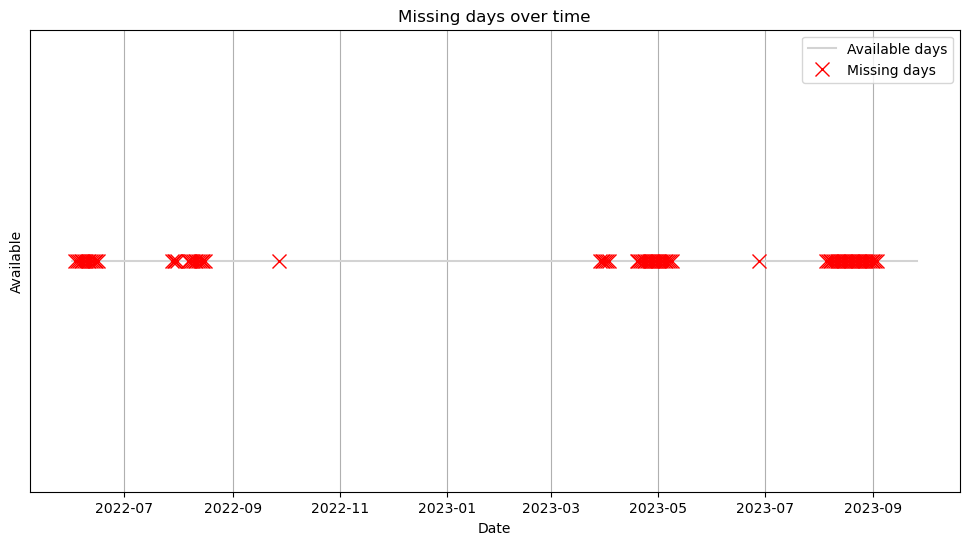

In [135]:
all_days, missing_days = missing_dates(df, "date_time", "d")

plt.figure(figsize=(12, 6))
plt.plot(all_days, np.ones(len(all_days)), color='lightgray', label='Available days')
plt.plot(missing_days, np.ones(len(missing_days)), 'x', markersize=10, color='red', label='Missing days')
plt.xlabel('Date')
plt.ylabel('Available')
plt.title('Missing days over time')
plt.yticks([])
plt.legend()
plt.grid(True)

In [136]:
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

sum_per_weekday = {k:0 for k in weekdays}
for day in missing_days:
    sum_per_weekday[weekdays[day.weekday()]] += 1

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

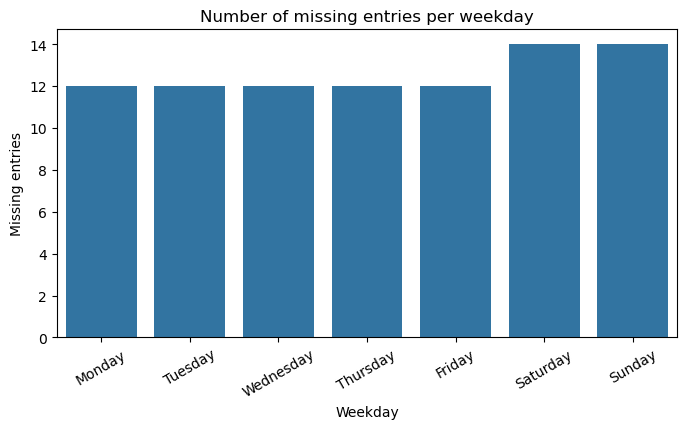

In [137]:
plt.figure(figsize=(8, 4))
sns.barplot(sum_per_weekday)
plt.xlabel("Weekday")
plt.ylabel("Missing entries")
plt.title("Number of missing entries per weekday")
plt.xticks(rotation=30)

In [138]:
all_hours, missing_hours = missing_dates(df, date_col="date_time", freq='h')

sum_per_hour = {k:0 for k in range(24)}
for hour in missing_hours:
    sum_per_hour[hour.hour] += 1

C:\Users\Leonard\AppData\Local\Temp\ipykernel_7592\114676700.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_missing_dates = df_missing_dates.fillna(True)


Text(0.5, 1.0, 'Number of missing entries per hour')

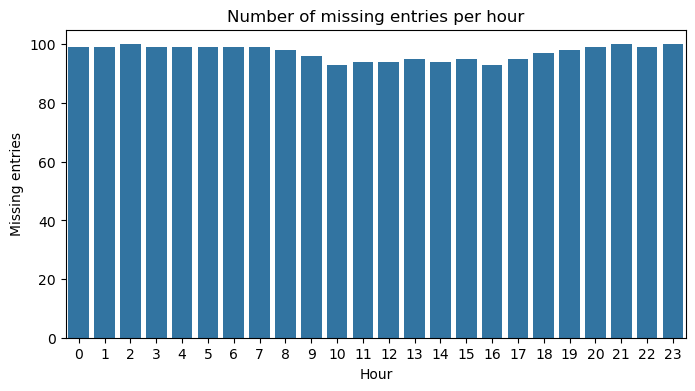

In [139]:
plt.figure(figsize=(8, 4))
sns.barplot(sum_per_hour)
plt.xlabel("Hour")
plt.ylabel("Missing entries")
plt.title("Number of missing entries per hour")

### Comparisons

#### Outliers

##### Temperature and Humidity

([<matplotlib.axis.XTick at 0x1f1d43af170>,
 [Text(1, 0, 'tmp'), Text(2, 0, 'hum')])

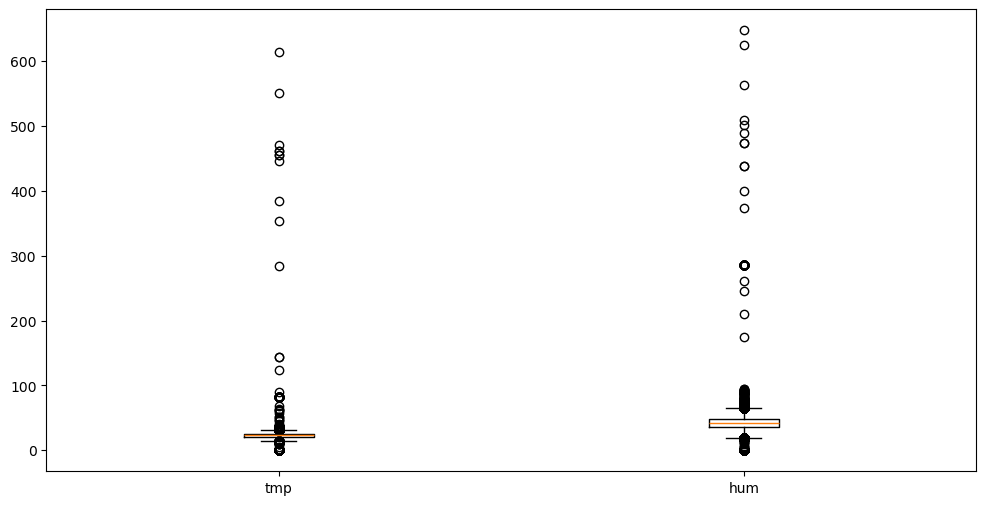

In [140]:
plt.figure(figsize=(12, 6))
plt.boxplot([df["tmp"], df["hum"]])
plt.xticks([1,2], ["tmp", "hum"])

##### CO2 and VOC

([<matplotlib.axis.XTick at 0x1f1d42f2ba0>,
 [Text(1, 0, 'CO2'), Text(2, 0, 'VOC')])

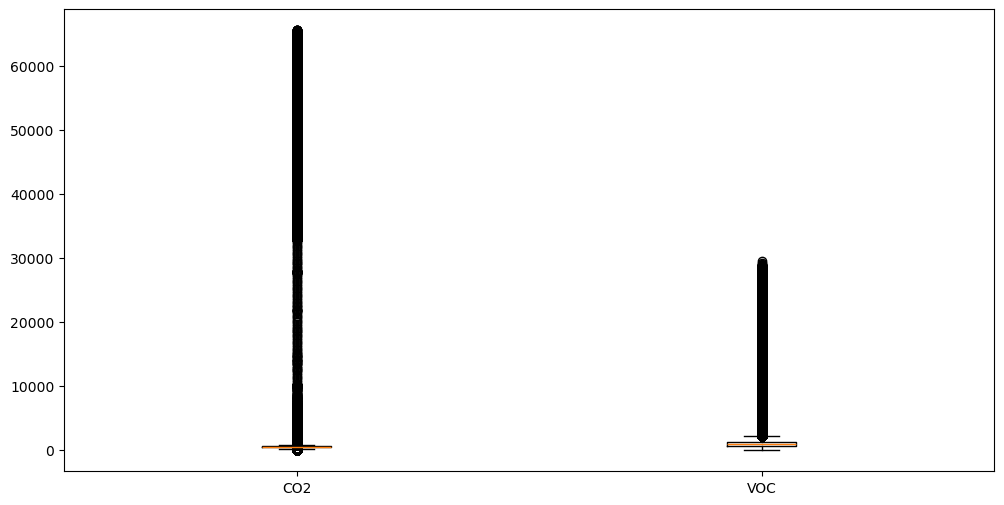

In [141]:
plt.figure(figsize=(12, 6))
plt.boxplot([df["CO2"], df["VOC"]])
plt.xticks([1,2], ["CO2", "VOC"])

##### Visible light and Infrared

([<matplotlib.axis.XTick at 0x1f1d42d0aa0>,
 [Text(1, 0, 'vis'), Text(2, 0, 'IR')])

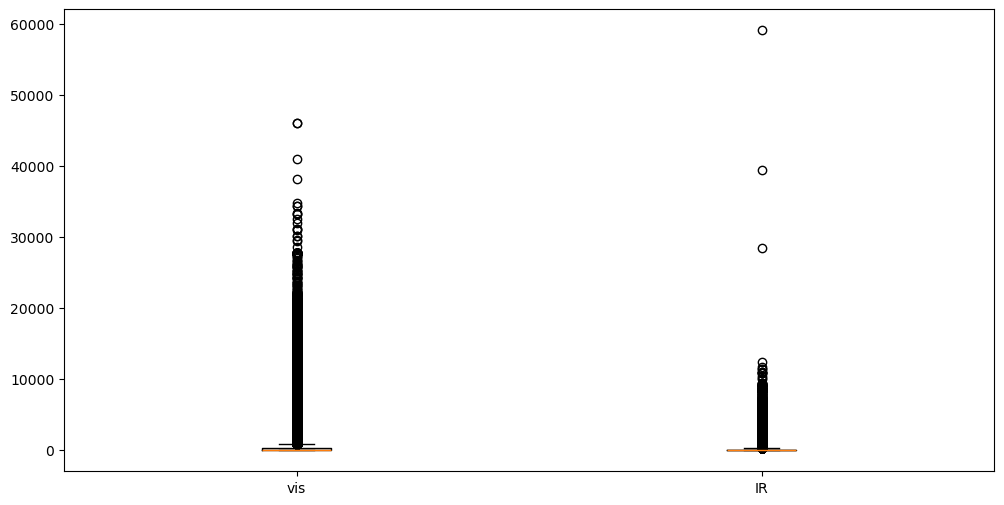

In [142]:
plt.figure(figsize=(12, 6))
plt.boxplot([df["vis"], df["IR"]])
plt.xticks([1,2], ["vis", "IR"])

#### Distributions

##### Temperature and Humidity

In [143]:
df_filtered_temp = remove_outliers(df, "tmp")
df_filtered_hum = remove_outliers(df, "hum")

Text(0, 0.5, 'Number of measurements')

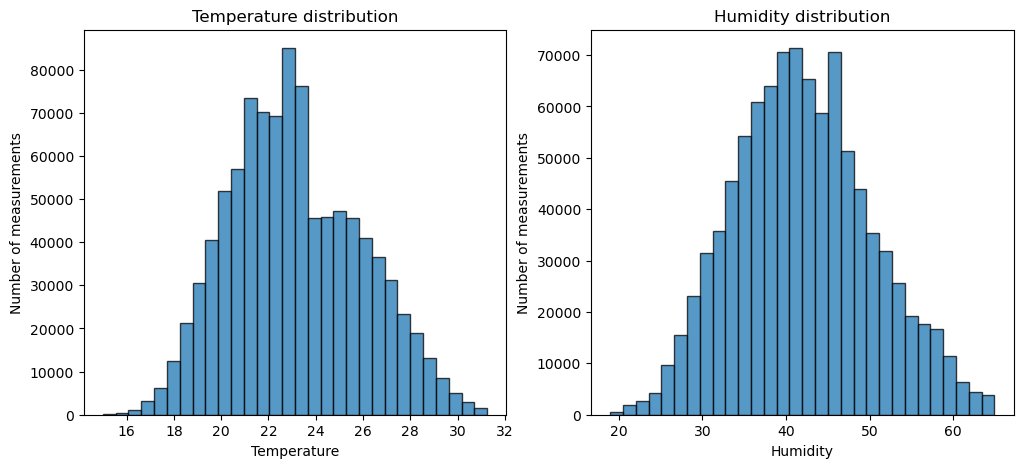

In [144]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.hist(df_filtered_temp['tmp'], bins=30, alpha=0.75, edgecolor='black')
ax1.set_title('Temperature distribution')
ax1.set_xlabel('Temperature')
ax1.set_ylabel('Number of measurements')

ax2.hist(df_filtered_hum['hum'], bins=30, alpha=0.75, edgecolor='black')
ax2.set_title('Humidity distribution')
ax2.set_xlabel('Humidity')
ax2.set_ylabel('Number of measurements')

##### CO2 and VOC

In [145]:
df_filtered_CO2 = remove_outliers(df, "CO2")
df_filtered_VOC = remove_outliers(df, "VOC")

Text(0, 0.5, 'Number of measurements')

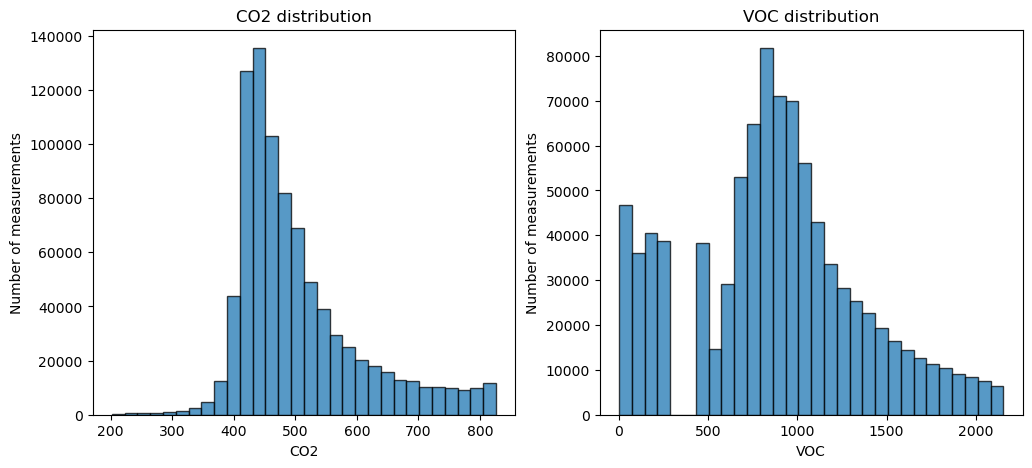

In [146]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.hist(df_filtered_CO2['CO2'], bins=30, alpha=0.75, edgecolor='black')
ax1.set_title('CO2 distribution')
ax1.set_xlabel('CO2')
ax1.set_ylabel('Number of measurements')

ax2.hist(df_filtered_VOC['VOC'], bins=30, alpha=0.75, edgecolor='black')
ax2.set_title('VOC distribution')
ax2.set_xlabel('VOC')
ax2.set_ylabel('Number of measurements')

##### Visible light and Infrared

In [147]:
df_filtered_vis = remove_outliers(df, "vis")
df_filtered_IR = remove_outliers(df, "IR")

Text(0, 0.5, 'Number of measurements')

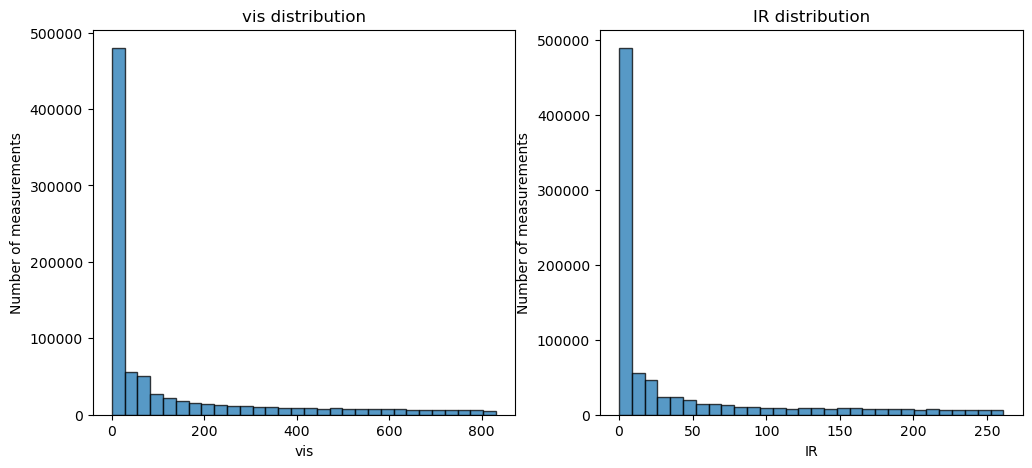

In [148]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.hist(df_filtered_vis['vis'], bins=30, alpha=0.75, edgecolor='black')
ax1.set_title('vis distribution')
ax1.set_xlabel('vis')
ax1.set_ylabel('Number of measurements')

ax2.hist(df_filtered_IR['IR'], bins=30, alpha=0.75, edgecolor='black')
ax2.set_title('IR distribution')
ax2.set_xlabel('IR')
ax2.set_ylabel('Number of measurements')

#### Development over time

##### Temperature and Humidity

In [149]:
df_daily_temp = resample(df_filtered_temp, "date_time", "tmp", "d")
df_daily_hum = resample(df_filtered_hum, "date_time", "hum", "d")

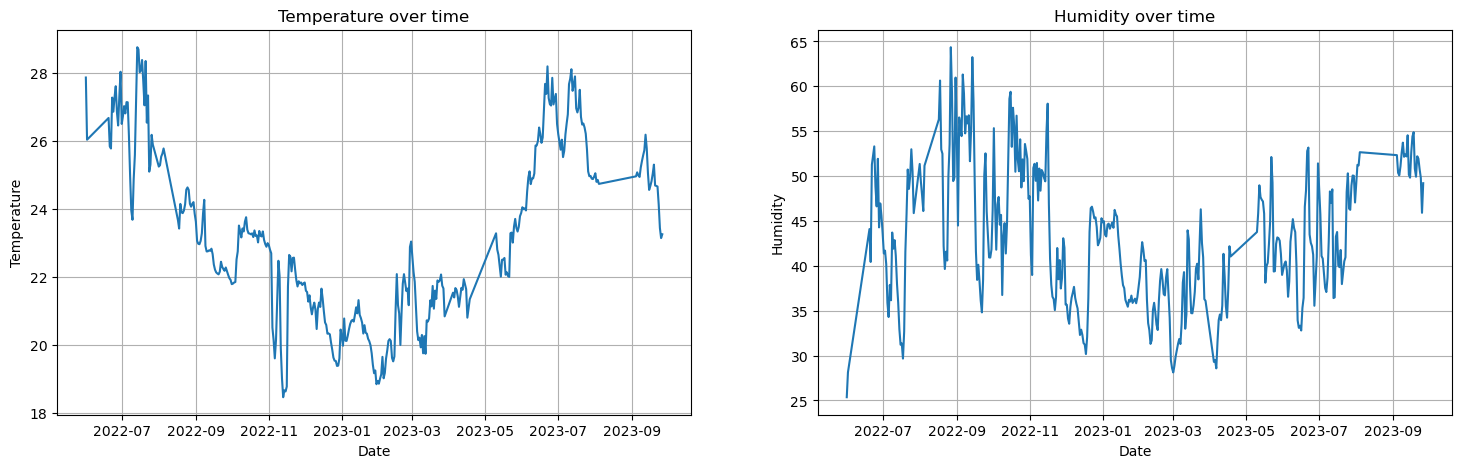

In [150]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))

sns.lineplot(data=df_daily_temp, x=df_daily_temp["date_time"], y='tmp', ax=ax1)
ax1.set_title('Temperature over time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature')
ax1.grid(True)

sns.lineplot(data=df_daily_hum, x=df_daily_hum["date_time"], y='hum', ax=ax2)
ax2.set_title('Humidity over time')
ax2.set_xlabel('Date')
ax2.set_ylabel('Humidity')
ax2.grid(True)

##### CO2 and VOC

In [151]:
df_daily_CO2 = resample(df_filtered_CO2, "date_time", "CO2", "d")
df_daily_VOC = resample(df_filtered_VOC, "date_time", "VOC", "d")

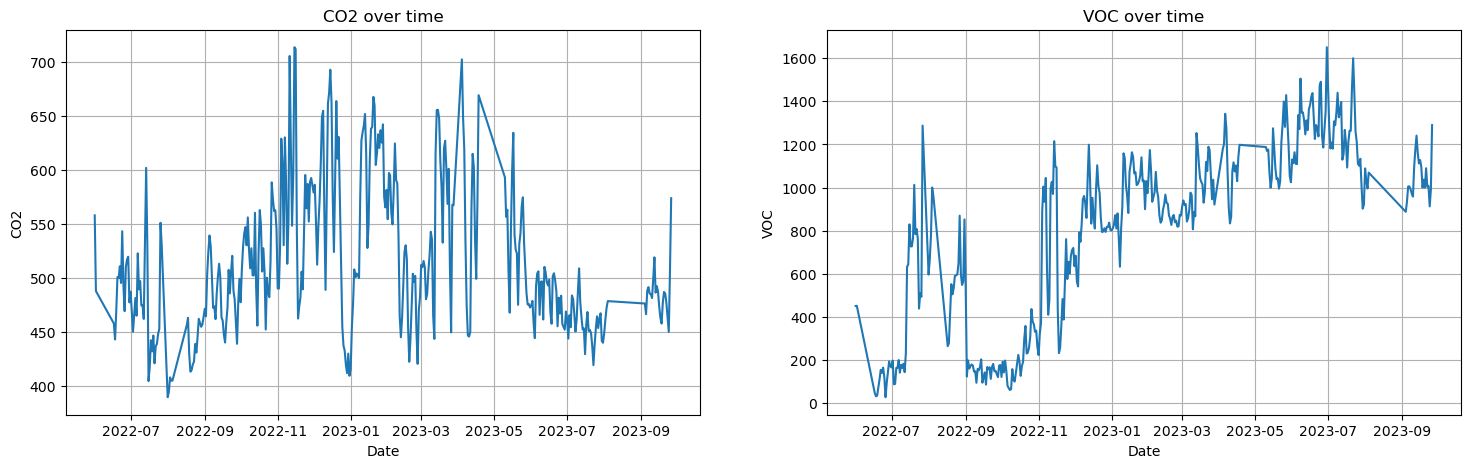

In [152]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))

sns.lineplot(data=df_daily_CO2, x=df_daily_CO2["date_time"], y='CO2', ax=ax1)
ax1.set_title('CO2 over time')
ax1.set_xlabel('Date')
ax1.set_ylabel('CO2')
ax1.grid(True)

sns.lineplot(data=df_daily_VOC, x=df_daily_VOC["date_time"], y='VOC', ax=ax2)
ax2.set_title('VOC over time')
ax2.set_xlabel('Date')
ax2.set_ylabel('VOC')
ax2.grid(True)

##### Visible light and Infrared

In [153]:
df_daily_vis = resample(df_filtered_vis, "date_time", "vis", "d")
df_daily_IR = resample(df_filtered_IR, "date_time", "IR", "d")

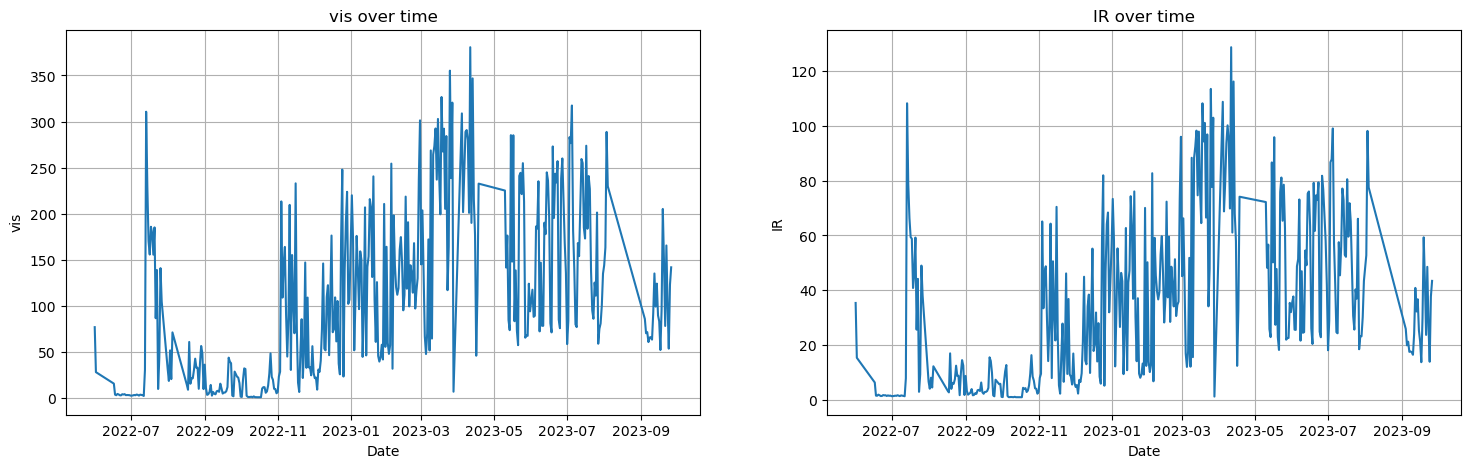

In [154]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))

sns.lineplot(data=df_daily_vis, x=df_daily_vis["date_time"], y='vis', ax=ax1)
ax1.set_title('vis over time')
ax1.set_xlabel('Date')
ax1.set_ylabel('vis')
ax1.grid(True)

sns.lineplot(data=df_daily_IR, x=df_daily_IR["date_time"], y='IR', ax=ax2)
ax2.set_title('IR over time')
ax2.set_xlabel('Date')
ax2.set_ylabel('IR')
ax2.grid(True)

In [155]:
df_scaled_temp = scale(df_daily_temp, "tmp")
df_scaled_hum = scale(df_daily_hum, "hum")
df_scaled_CO2 = scale(df_daily_CO2, "CO2")
df_scaled_VOC = scale(df_daily_VOC, "VOC")
df_scaled_vis = scale(df_daily_vis, "vis")
df_scaled_IR = scale(df_daily_IR, "IR")

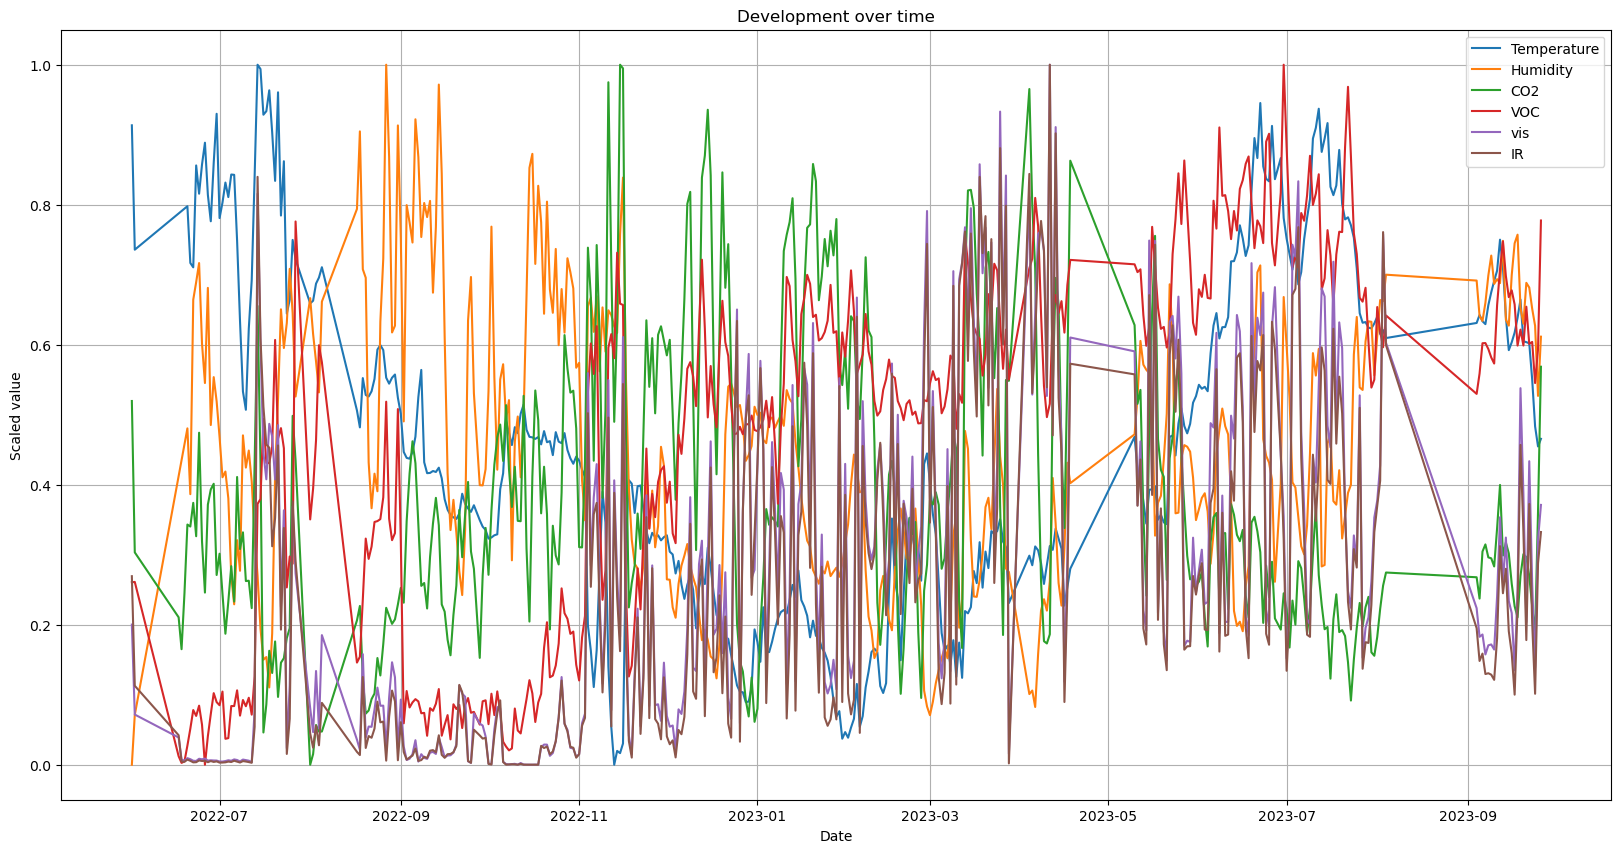

In [156]:
plt.figure(figsize=(20, 10))
sns.lineplot(x=df_scaled_temp["date_time"], y=df_scaled_temp["tmp"], label="Temperature")
sns.lineplot(x=df_scaled_hum["date_time"], y=df_scaled_hum["hum"], label="Humidity")
sns.lineplot(x=df_scaled_CO2["date_time"], y=df_scaled_CO2["CO2"], label="CO2")
sns.lineplot(x=df_scaled_VOC["date_time"], y=df_scaled_VOC["VOC"], label="VOC")
sns.lineplot(x=df_scaled_vis["date_time"], y=df_scaled_vis["vis"], label="vis")
sns.lineplot(x=df_scaled_IR["date_time"], y=df_scaled_IR["IR"], label="IR")
plt.xlabel("Date")
plt.ylabel("Scaled value")
plt.title("Development over time")
plt.grid(True)

In [159]:
#TODO Testen, ob Außreißer bei features parallel auftreten (Wenn ja, Manipulation des Sensors)
#TODO Lineplot comparisons lesbar machen (evt rolling Window anwenden), auf Sinnhaftigkeit des Vergleiches prüfen

#### Dashboard